In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
train = pd.read_csv('train.csv')

In [129]:
test = pd.read_csv('test.csv')

<AxesSubplot:>

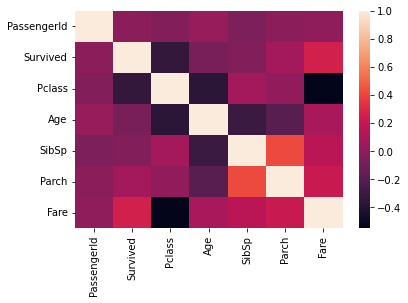

In [130]:
sns.heatmap(train.corr())

In [131]:
train.corr()['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [132]:
y_pred = pd.read_csv('gender_submission.csv')

In [133]:
y_pred

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [134]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [135]:
test['Survived'] = y_pred['Survived']

In [136]:
test.corr()['Survived'].sort_values()

Pclass        -0.108615
PassengerId   -0.023245
Age           -0.000013
SibSp          0.099943
Parch          0.159120
Fare           0.191514
Survived       1.000000
Name: Survived, dtype: float64

In [137]:
train.corr()['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [138]:
len(train)

891

In [139]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [140]:
100*(177/891)

19.865319865319865

In [141]:
train.Age.mean()

29.69911764705882

In [142]:
train.Age.median()

28.0

In [143]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [144]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [145]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [146]:
train.columns == test.columns

array([ True, False, False, False, False, False, False, False, False,
       False, False, False])

<AxesSubplot:xlabel='Age', ylabel='Count'>

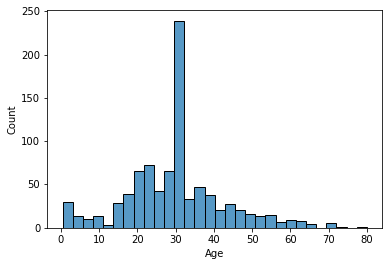

In [147]:
sns.histplot(train['Age'])

In [148]:
train = train.drop('Cabin',axis=1)
test = test.drop('Cabin',axis=1)

In [149]:
train.Sex = train.Sex.map({'male':0,'female':1})
test.Sex = test.Sex.map({'male':0,'female':1})

In [150]:
train.Embarked = train.Embarked.fillna('S')

In [151]:
train.Embarked = train.Embarked.map({'S':0,'C':1,'Q':2})
test.Embarked = test.Embarked.map({'S':0,'C':1,'Q':2})

In [154]:
test['Age'] = test['Age'].fillna(train['Age'].mean())

In [158]:
test.Fare = test.Fare.fillna(test.Fare.mean())

In [163]:
test = test.drop(['Name','Ticket'],axis=1)
train = train.drop(['Name','Ticket'],axis=1)

In [168]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [169]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,0,34.5,0,0,7.8292,2,0
1,893,3,1,47.0,1,0,7.0000,0,1
2,894,2,0,62.0,0,0,9.6875,2,0
3,895,3,0,27.0,0,0,8.6625,0,0
4,896,3,1,22.0,1,1,12.2875,0,1


In [288]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']
X_test = test.drop('Survived',axis=1)
y_test = test['Survived']

In [172]:
X_train.shape,X_test.shape

((891, 8), (418, 8))

In [175]:
y_train.shape,y_test.shape

((891,), (418,))

In [176]:
from sklearn.preprocessing import StandardScaler

In [177]:
std = StandardScaler()

In [178]:
scaled_X_train = std.fit_transform(X_train)
scaled_X_test = std.transform(X_test)

In [179]:
from sklearn.svm import SVC

In [289]:
model.fit(scaled_X_train,y_train)

SVC(C=0.01, kernel='linear')

In [290]:
y_pred = model.predict(scaled_X_test)

In [183]:
from sklearn.metrics import confusion_matrix,classification_report

In [291]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [186]:
confusion_matrix(y_test,y_pred)

array([[255,  11],
       [ 17, 135]])

In [187]:
y_final = pd.read_csv('./gender_submission.csv')

In [188]:
y_final = y_final.drop('Survived',axis=1)

In [189]:
y_final = y_final.PassengerId

In [292]:
new_pred =pd.DataFrame(index = y_final,columns=np.array(['Survived']),data = y_pred)

In [293]:
new_pred.to_csv('new_norm.csv')